<a href="https://colab.research.google.com/github/JoseM741/Desafio-Latam-Tiendas/blob/main/Store_Alura_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.-Importación de Datos



In [ ]:
# Importando la librería de pandas y los datos desde el repositorio de GitHub
import pandas as pd
# Para crear graficas sencillas.
import matplotlib.pyplot as plt


# URLs raw de los archivos CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargando los datos desde las URLs raw
tienda_1 = pd.read_csv(url1)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

print("Informacion cargada con exito!")


Informacion cargada con exito!


In [ ]:
# Mostrar las primeras filas del DataFrame en forma horizontal
print(tienda_1.head(5).to_string(index=False))

         Producto Categoría del Producto   Precio  Costo de envío Fecha de Compra        Vendedor Lugar de Compra  Calificación     Método de pago  Cantidad de cuotas      lat       lon
Asistente virtual           Electrónicos 164300.0          6900.0      16/01/2021     Pedro Gomez          Bogotá             4 Tarjeta de crédito                   8  4.60971 -74.08175
  Mesa de comedor                Muebles 192300.0          8400.0      18/05/2022 Beatriz Morales        Medellín             1 Tarjeta de crédito                   4  6.25184 -75.56359
    Juego de mesa               Juguetes 209600.0         15900.0      15/03/2021  Juan Fernandez       Cartagena             1 Tarjeta de crédito                   1 10.39972 -75.51444
       Microondas      Electrodomésticos 757500.0         41000.0      03/05/2022  Juan Fernandez            Cali             4              Nequi                   1  3.43722 -76.52250
 Silla de oficina                Muebles 335200.0         20200.0     

In [ ]:
# Mostrar cantidad y los nombres de las columnas
print(f"Son {len(tienda_1.columns)} columnas")
print(list(tienda_1.columns))

Son 12 columnas
['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']


### 2.-Análisis de Ingresos



Ingreso total por cada tienda.

En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos

Ingresos Totales Tiendas


In [ ]:
ingresos_total_tienda_1 = tienda_1['Precio'].sum()
print("Ingresos Totales Tienda N°1:", f"${ingresos_total_tienda_1:,.0f}".replace(",", "."))

ingresos_total_tienda_2 = tienda_2['Precio'].sum()
print("Ingresos Totales Tienda N°2:", f"${ingresos_total_tienda_2:,.0f}".replace(",", "."))

ingresos_total_tienda_3 = tienda_3['Precio'].sum()
print("Ingresos Totales Tienda N°3:", f"${ingresos_total_tienda_3:,.0f}".replace(",", "."))

ingresos_total_tienda_4 = tienda_4['Precio'].sum()
print("Ingresos Totales Tienda N°4:", f"${ingresos_total_tienda_4:,.0f}".replace(",", "."))

if (ingresos_total_tienda_1 > ingresos_total_tienda_2 and ingresos_total_tienda_1 > ingresos_total_tienda_3 and ingresos_total_tienda_1 > ingresos_total_tienda_4):
  print("La tienda con mayor ingresos es la tienda N°1, con un total de:", f"${ingresos_total_tienda_1:,.0f}".replace(",", "."))


Ingresos Totales Tienda N°1: $1.150.880.400
Ingresos Totales Tienda N°2: $1.116.343.500
Ingresos Totales Tienda N°3: $1.098.019.600
Ingresos Totales Tienda N°4: $1.038.375.700
La tienda con mayor ingresos es la tienda N°1, con un total de: $1.150.880.400


### 3.- Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda


In [ ]:
cantidad_productos_tienda1 = tienda_1['Producto'].count()
print(f'La cantidad de productos vendidos en la tienda 1 es: {cantidad_productos_tienda1:,}')

cantidad_productos_tienda2 = tienda_2['Producto'].count()
print(f'La cantidad de productos vendidos en la tienda 2 es: {cantidad_productos_tienda2:,}')

cantidad_productos_tienda3 = tienda_3['Producto'].count()
print(f'La cantidad de productos vendidos en la tienda 3 es: {cantidad_productos_tienda3:,}')

cantidad_productos_tienda4 = tienda_4['Producto'].count()
print(f'La cantidad de productos vendidos en la tienda 4 es: {cantidad_productos_tienda4:,}')


La cantidad de productos vendidos en la tienda 1 es: 2,359
La cantidad de productos vendidos en la tienda 2 es: 2,359
La cantidad de productos vendidos en la tienda 3 es: 2,359
La cantidad de productos vendidos en la tienda 4 es: 2,358


In [ ]:
# Función para analizar cada tienda individualmente
def analizar_tienda(dataframe, nombre_tienda):
    ventas_por_categoria = dataframe.groupby('Categoría del Producto')['Precio'].sum()
    categorias_populares = ventas_por_categoria.sort_values(ascending=False)

    print(f"Categorías más populares en {nombre_tienda}:")
    # Iterar sobre las categorías y formatear las ventas con separador de miles
    for categoria, ventas in categorias_populares.items():
        print(f"{categoria}: {int(ventas):,} ventas")
    print("\n")  # Espacio para separar resultados

# Aplicar la función para cada tienda
analizar_tienda(tienda_1, "Tienda 1")

Categorías más populares en Tienda 1:
Electrónicos: 429,493,500 ventas
Electrodomésticos: 363,685,200 ventas
Muebles: 187,633,700 ventas
Instrumentos musicales: 91,299,000 ventas
Deportes y diversión: 39,290,000 ventas
Juguetes: 17,995,700 ventas
Artículos para el hogar: 12,698,400 ventas
Libros: 8,784,900 ventas




En la Tienda N°1,

La Categoría más vendida fue: Electrónicos, menos vendida: Libros

In [ ]:
#Tienda N°2
analizar_tienda(tienda_2, "Tienda 2")

Categorías más populares en Tienda 2:
Electrónicos: 410,831,100 ventas
Electrodomésticos: 348,567,800 ventas
Muebles: 176,426,300 ventas
Instrumentos musicales: 104,990,300 ventas
Deportes y diversión: 34,744,500 ventas
Juguetes: 15,945,400 ventas
Artículos para el hogar: 14,746,900 ventas
Libros: 10,091,200 ventas




En la Tienda N°2,

La Categoría más vendida fue: Electrónicos, menos vendida: Libros

In [ ]:
#Tienda N°3
analizar_tienda(tienda_3, "Tienda 3")

Categorías más populares en Tienda 3:
Electrónicos: 410,775,800 ventas
Electrodomésticos: 329,237,900 ventas
Muebles: 201,072,100 ventas
Instrumentos musicales: 77,380,900 ventas
Deportes y diversión: 35,593,100 ventas
Juguetes: 19,401,100 ventas
Artículos para el hogar: 15,060,000 ventas
Libros: 9,498,700 ventas




En la Tienda N°3,

La Categoría más vendida fue: Electrónicos, menos vendida: Libros

In [ ]:
#Tienda N°4
analizar_tienda(tienda_4, "Tienda 4")

Categorías más populares en Tienda 4:
Electrónicos: 409,476,100 ventas
Electrodomésticos: 283,260,200 ventas
Muebles: 192,528,900 ventas
Instrumentos musicales: 75,102,400 ventas
Deportes y diversión: 33,350,100 ventas
Juguetes: 20,262,200 ventas
Artículos para el hogar: 15,074,500 ventas
Libros: 9,321,300 ventas




En la Tienda N°4,

La Categoría más vendida fue: Electrónicos, menos vendida: Libros

### 4.- Productos más y menos vendidos

In [ ]:
#TIENDA N°1
# Agrupar productos, sumar precios y ordenar
productos_ordenados = tienda_1.groupby('Producto')['Precio'].sum().sort_values(ascending=False)

# Calcular el total de la tienda
total_tienda = productos_ordenados.sum()

# Aplicar separador de miles
productos_ordenados_formateado = productos_ordenados.map('{:,.0f}'.format)

# Extraer los 10 más caros y 10 más baratos
top_10 = productos_ordenados.head(10).reset_index()
bottom_10 = productos_ordenados.sort_values(ascending=True).head(10).reset_index()

# Asegurar que los precios sean tipo numérico antes de aplicar formato
top_10['Precio'] = top_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")
bottom_10['Precio'] = bottom_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")

# Crear un DataFrame con dos columnas
tabla_comparativa = pd.DataFrame({'Top 10 Más Caros': top_10['Producto'] + ' - ' + top_10['Precio'],
                                  'Top 10 Más Baratos': bottom_10['Producto'] + ' - ' + bottom_10['Precio']})

# Mostrar el total de la tienda y la tabla
print(f"Total tienda N°1: {total_tienda:,.0f}\n")
print(tabla_comparativa)

Total tienda N°1: 1,150,880,400

                  Top 10 Más Caros                       Top 10 Más Baratos
0      TV LED UHD 4K - 142,150,200             Cuerda para saltar - 652,800
1       Refrigerador - 112,143,300                 Dinosaurio Rex - 688,900
2           Iphone 15 - 97,902,200                Cubo mágico 8x8 - 696,900
3            Smart TV - 67,452,100                 Set de vasos - 1,359,100
4    Lavadora de ropa - 65,783,600            Ajedrez de madera - 1,430,600
5        Lavavajillas - 62,054,900      Dashboards con Power BI - 1,455,700
6    Secadora de ropa - 59,062,400      Bloques de construcción - 1,865,700
7         Tablet ABXY - 47,639,800                  Muñeca bebé - 1,937,300
8             Batería - 37,693,900  Ciencia de datos con Python - 2,063,600
9  Guitarra eléctrica - 37,292,200    Iniciando en programación - 2,093,100


Producto más vendido de la tienda N°1: TV LED UHD 4K

Producto menos vendido de la tienda N°1: CUERDA PARA SALTAR

In [ ]:
#TIENDA N°2
# Agrupar productos, sumar precios y ordenar
productos_ordenados = tienda_2.groupby('Producto')['Precio'].sum().sort_values(ascending=False)

# Calcular el total de la tienda
total_tienda = productos_ordenados.sum()

# Aplicar separador de miles
productos_ordenados_formateado = productos_ordenados.map('{:,.0f}'.format)

# Extraer los 10 más caros y 10 más baratos
top_10 = productos_ordenados.head(10).reset_index()
bottom_10 = productos_ordenados.sort_values(ascending=True).head(10).reset_index()

# Asegurar que los precios sean tipo numérico antes de aplicar formato
top_10['Precio'] = top_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")
bottom_10['Precio'] = bottom_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")

# Crear un DataFrame con dos columnas
tabla_comparativa = pd.DataFrame({'Top 10 Más Caros': top_10['Producto'] + ' - ' + top_10['Precio'],
                                  'Top 10 Más Baratos': bottom_10['Producto'] + ' - ' + bottom_10['Precio']})

# Mostrar el total de la tienda y la tabla
print(f"Total tienda N°2: {total_tienda:,.0f}\n")
print(tabla_comparativa)

Total tienda N°2: 1,116,343,500

                Top 10 Más Caros                   Top 10 Más Baratos
0        Iphone 15 - 113,225,800            Cubo mágico 8x8 - 643,600
1    TV LED UHD 4K - 103,375,000             Dinosaurio Rex - 770,300
2      Refrigerador - 97,632,500         Cuerda para saltar - 856,900
3  Lavadora de ropa - 66,762,300        Ajedrez de madera - 1,287,700
4          Smart TV - 61,142,000             Set de vasos - 1,542,600
5  Secadora de ropa - 59,115,100  Dashboards con Power BI - 1,599,500
6      Lavavajillas - 58,767,500               Cubertería - 1,732,900
7       Tablet ABXY - 56,209,800  Bloques de construcción - 1,789,400
8           Batería - 46,175,300      Balón de baloncesto - 2,091,300
9      Celular ABXY - 41,668,900             Vaso térmico - 2,155,900


Producto más vendido de la tienda N°2: IPHONE 15

Producto menos vendido de la tienda N°2: CUBO MÁGICO 8x8

In [ ]:
#TIENDA N°3
# Agrupar productos, sumar precios y ordenar
productos_ordenados = tienda_3.groupby('Producto')['Precio'].sum().sort_values(ascending=False)

# Calcular el total de la tienda
total_tienda = productos_ordenados.sum()

# Aplicar separador de miles
productos_ordenados_formateado = productos_ordenados.map('{:,.0f}'.format)

# Extraer los 10 más caros y 10 más baratos
top_10 = productos_ordenados.head(10).reset_index()
bottom_10 = productos_ordenados.sort_values(ascending=True).head(10).reset_index()

# Asegurar que los precios sean tipo numérico antes de aplicar formato
top_10['Precio'] = top_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")
bottom_10['Precio'] = bottom_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")

# Crear un DataFrame con dos columnas
tabla_comparativa = pd.DataFrame({'Top 10 Más Caros': top_10['Producto'] + ' - ' + top_10['Precio'],
                                  'Top 10 Más Baratos': bottom_10['Producto'] + ' - ' + bottom_10['Precio']})

# Mostrar el total de la tienda y la tabla
print(f"Total tienda N°3: {total_tienda:,.0f}\n")
print(tabla_comparativa)

Total tienda N°3: 1,098,019,600

                Top 10 Más Caros                   Top 10 Más Baratos
0      Refrigerador - 99,889,700            Cubo mágico 8x8 - 640,400
1     TV LED UHD 4K - 96,669,100             Dinosaurio Rex - 795,600
2         Iphone 15 - 93,225,700         Cuerda para saltar - 853,800
3          Smart TV - 78,837,300             Set de vasos - 1,210,700
4      Lavavajillas - 64,364,800  Bloques de construcción - 1,237,200
5       Tablet ABXY - 58,440,100        Ajedrez de madera - 1,355,300
6  Lavadora de ropa - 57,459,100  Dashboards con Power BI - 1,372,600
7  Secadora de ropa - 49,798,300             Vaso térmico - 1,725,600
8      Celular ABXY - 43,419,600               Cubertería - 1,775,900
9         Cama king - 38,834,700              Muñeca bebé - 1,932,600


Producto más vendido de la tienda N°3: REFRIGERADOR

Producto menos vendido de la tienda N°3: CUBO MÁGICO 8x8

In [ ]:
#TIENDA N°4
# Agrupar productos, sumar precios y ordenar
productos_ordenados = tienda_4.groupby('Producto')['Precio'].sum().sort_values(ascending=False)

# Calcular el total de la tienda
total_tienda = productos_ordenados.sum()

# Aplicar separador de miles
productos_ordenados_formateado = productos_ordenados.map('{:,.0f}'.format)

# Extraer los 10 más caros y 10 más baratos
top_10 = productos_ordenados.head(10).reset_index()
bottom_10 = productos_ordenados.sort_values(ascending=True).head(10).reset_index()

# Asegurar que los precios sean tipo numérico antes de aplicar formato
top_10['Precio'] = top_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")
bottom_10['Precio'] = bottom_10['Precio'].astype(float).apply(lambda x: f"{x:,.0f}")

# Crear un DataFrame con dos columnas
tabla_comparativa = pd.DataFrame({'Top 10 Más Caros': top_10['Producto'] + ' - ' + top_10['Precio'],
                                  'Top 10 Más Baratos': bottom_10['Producto'] + ' - ' + bottom_10['Precio']})

# Mostrar el total de la tienda y la tabla
print(f"Total tienda N°4: {total_tienda:,.0f}\n")
print(tabla_comparativa)

Total tienda N°4: 1,038,375,700

                Top 10 Más Caros                       Top 10 Más Baratos
0         Iphone 15 - 96,697,500             Cuerda para saltar - 704,800
1     TV LED UHD 4K - 90,295,300                Cubo mágico 8x8 - 748,400
2          Smart TV - 82,790,400                 Dinosaurio Rex - 858,100
3      Refrigerador - 75,271,900            Ajedrez de madera - 1,075,500
4       Tablet ABXY - 56,723,100                 Set de vasos - 1,471,800
5      Lavavajillas - 55,349,300      Bloques de construcción - 1,909,800
6  Lavadora de ropa - 52,463,600      Dashboards con Power BI - 1,990,600
7  Secadora de ropa - 42,262,200  Ciencia de datos con Python - 2,108,800
8      Celular ABXY - 40,171,600    Iniciando en programación - 2,118,200
9         Cama king - 37,555,400                 Vaso térmico - 2,152,500


Producto más vendido de la tienda N°4: IPHONE 15

Producto menos vendido de la tienda N°4: CUERDA PARA SALTAR

### 5.- Calificación de Tiendas

In [ ]:
calific_1=tienda_1['Calificación'].mean()
calific_2=tienda_2['Calificación'].mean()
calific_3=tienda_3['Calificación'].mean()
calific_4=tienda_4['Calificación'].mean()
print(f"La Califiación de la Tienda N°1 es: {calific_1:.2f} ★")
print(f"La Califiación de la Tienda N°2 es: {calific_2:.2f} ★")
print(f"La Califiación de la Tienda N°3 es: {calific_3:.2f} ★")
print(f"La Califiación de la Tienda N°4 es: {calific_4:.2f} ★")


La Califiación de la Tienda N°1 es: 3.98 ★
La Califiación de la Tienda N°2 es: 4.04 ★
La Califiación de la Tienda N°3 es: 4.05 ★
La Califiación de la Tienda N°4 es: 4.00 ★


### 6.- Costo envío promedio por tienda

In [ ]:
envio_prom1=tienda_1['Costo de envío'].mean()
envio_prom2=tienda_2['Costo de envío'].mean()
envio_prom3=tienda_3['Costo de envío'].mean()
envio_prom4=tienda_4['Costo de envío'].mean()
print(f"El Envío promedio de la Tienda N°1 es: {envio_prom1:,.2f}")
print(f"El Envío promedio de la Tienda N°2 es: {envio_prom2:,.2f}")
print(f"El Envío promedio de la Tienda N°3 es: {envio_prom3:,.2f}")
print(f"El Envío promedio de la Tienda N°4 es: {envio_prom4:,.2f}")


El Envío promedio de la Tienda N°1 es: 26,018.61
El Envío promedio de la Tienda N°2 es: 25,216.24
El Envío promedio de la Tienda N°3 es: 24,805.68
El Envío promedio de la Tienda N°4 es: 23,459.46


### 7.- Gráficos


Ingresos totales por tiendas

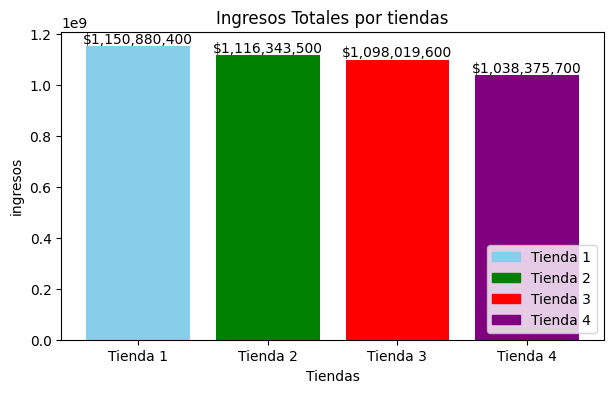

In [ ]:
#Datos de facturación
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingresos_total_tienda_1, ingresos_total_tienda_2, ingresos_total_tienda_3, ingresos_total_tienda_4]
colores = ['skyblue', 'green', 'red', 'purple']

#creando gráfico de barras
plt.figure(figsize=(7, 4))#tamaño gráfico
plt.bar(tiendas, ingresos, color=['skyblue','green','red','purple'])

#agregando valores sobre cada barra
for i, ingreso in enumerate(ingresos):
    plt.text(i, ingreso, f'${ingreso:,.0f}', ha='center', va='bottom')
#ejes gráfico
plt.xlabel('Tiendas')
plt.ylabel('ingresos')
plt.title('Ingresos Totales por tiendas')
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in colores], labels=tiendas, loc='lower right')
plt.show()

Distribución de ingresos por tiendas

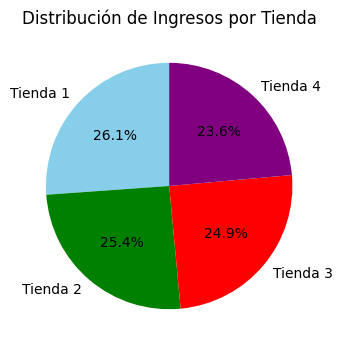

In [ ]:
import matplotlib.pyplot as plt
# Datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingresos_total_tienda_1, ingresos_total_tienda_2, ingresos_total_tienda_3, ingresos_total_tienda_4]
colores = ['skyblue', 'green', 'red', 'purple']

# Crear el gráfico de torta
plt.figure(figsize=(4, 4))
plt.pie(ingresos, labels=tiendas, autopct='%1.1f%%', colors=colores, startangle=90)

# Título
plt.title('Distribución de Ingresos por Tienda')

# Mostrar el gráfico
plt.show()

Categorías más vendidas por Tienda

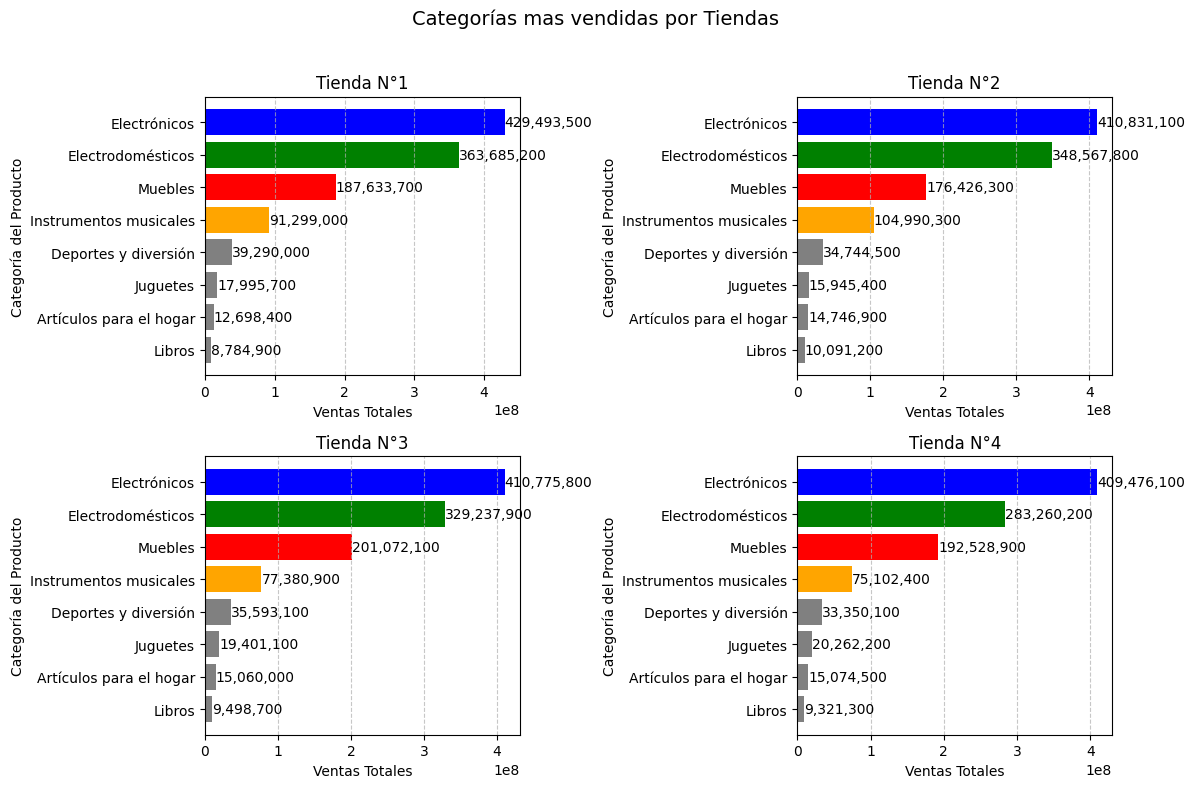

In [ ]:
import matplotlib.pyplot as plt

# Colores personalizados para categorías
colores_por_categoria = {
    "Electrónicos": "blue",
    "Electrodomésticos": "green",
    "Muebles": "red",
    "Instrumentos musicales": "orange",
    "otros": "silver"
}

# Función para graficar varias tiendas en subgráficos con orden y colores personalizados
def graficar_tiendas(dataframes, nombres_tiendas):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas, 2 columnas
    fig.suptitle('Categorías mas vendidas por Tiendas', fontsize=14)

    for ax, df, nombre_tienda in zip(axes.flatten(), dataframes, nombres_tiendas):
        ventas_por_categoria = df.groupby('Categoría del Producto')['Precio'].sum()
        ventas_por_categoria = ventas_por_categoria.sort_values(ascending=False)  # Orden de mayor a menor

        categorias = ventas_por_categoria.index
        ventas = ventas_por_categoria.values
        colores = [colores_por_categoria.get(categoria, "gray") for categoria in categorias]  # Color según categoría

        ax.barh(categorias, ventas, color=colores)
        ax.set_title(nombre_tienda, fontsize=12)
        ax.set_xlabel('Ventas Totales')
        ax.set_ylabel('Categoría del Producto')
        ax.invert_yaxis()
        ax.grid(axis='x', linestyle='--', alpha=0.7)

        # Mostrar valores en las barras
        for i, v in enumerate(ventas):
            ax.text(v, i, f"{int(v):,}", va='center', ha='left')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta para evitar solapamientos
    plt.show()

# Lista de DataFrames y nombres de tiendas
dataframes = [tienda_1, tienda_2, tienda_3, tienda_4]
nombres_tiendas = ["Tienda N°1", "Tienda N°2", "Tienda N°3", "Tienda N°4"]

# Aplicar la función para graficar todas las tiendas
graficar_tiendas(dataframes, nombres_tiendas)

Productos Más y menos Vendidos


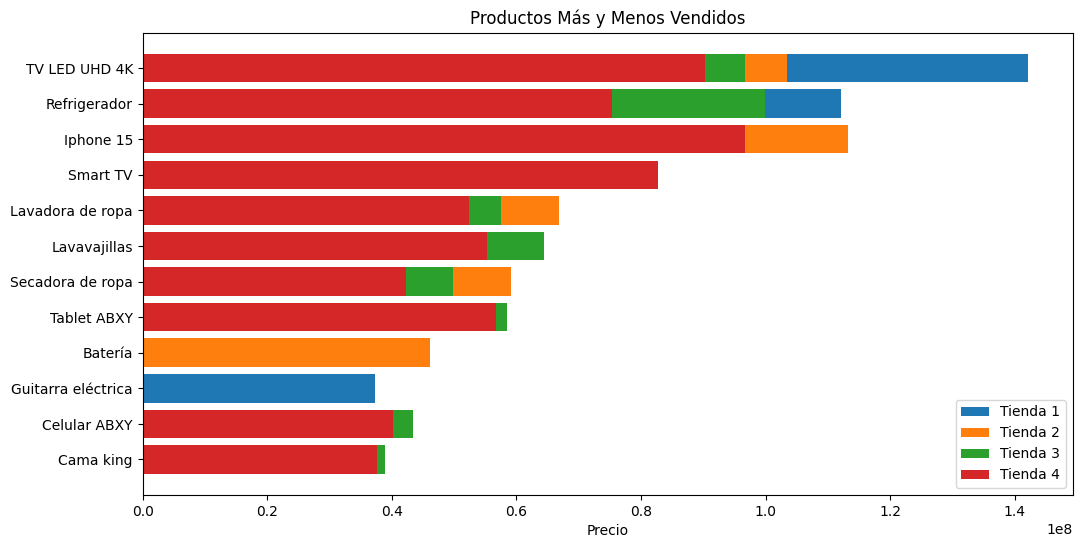

In [ ]:
import matplotlib.pyplot as plt

# Concatenar datos de todas las tiendas
df_tiendas = pd.concat([tienda_1.assign(Tienda='Tienda 1'),
                        tienda_2.assign(Tienda='Tienda 2'),
                        tienda_3.assign(Tienda='Tienda 3'),
                        tienda_4.assign(Tienda='Tienda 4')])

# Agrupar y calcular precios por tienda y producto
productos_ordenados = df_tiendas.groupby(['Tienda', 'Producto'])['Precio'].sum().reset_index()

# Extraer los 10 productos más caros por tienda
top_10_por_tienda = productos_ordenados.sort_values(['Tienda', 'Precio'], ascending=[True, False]).groupby('Tienda').head(10)

# Crear gráfico
plt.figure(figsize=(12, 6))
for tienda in top_10_por_tienda['Tienda'].unique():
    subset = top_10_por_tienda[top_10_por_tienda['Tienda'] == tienda]
    plt.barh(subset['Producto'], subset['Precio'], label=tienda)

plt.xlabel('Precio')
plt.title('Productos Más y Menos Vendidos')
plt.legend()
plt.gca().invert_yaxis()  # Invertir eje Y para mejor legibilidad
plt.show()

Calificación de tiendas

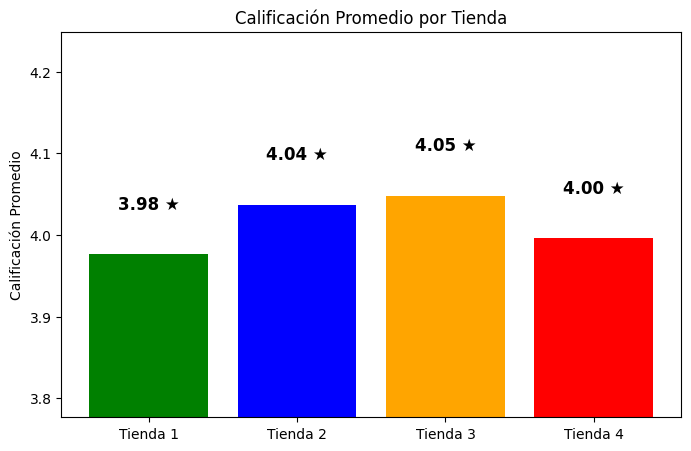

In [ ]:
import matplotlib.pyplot as plt

# Datos de calificación de las tiendas
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
calificaciones = [calific_1, calific_2, calific_3, calific_4]

# Definir el rango de valores en el eje Y ajustado
min_calif = min(calificaciones) - 0.2  # Reducir un poco por debajo del mínimo
max_calif = max(calificaciones) + 0.2  # Expandir por encima del máximo

# Crear gráfico de barras vertical con escala ajustada
plt.figure(figsize=(8, 5))
plt.bar(tiendas, calificaciones, color=['green', 'blue', 'orange', 'red'])
plt.ylabel("Calificación Promedio")
plt.title("Calificación Promedio por Tienda")

# Ajustar límites del eje Y para mejorar la visibilidad de diferencias
plt.ylim(min_calif, max_calif)

# Agregar valores sobre las barras
for i, v in enumerate(calificaciones):
    plt.text(i, v + 0.05, f"{v:.2f} ★", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

Costo envío promedio por tienda

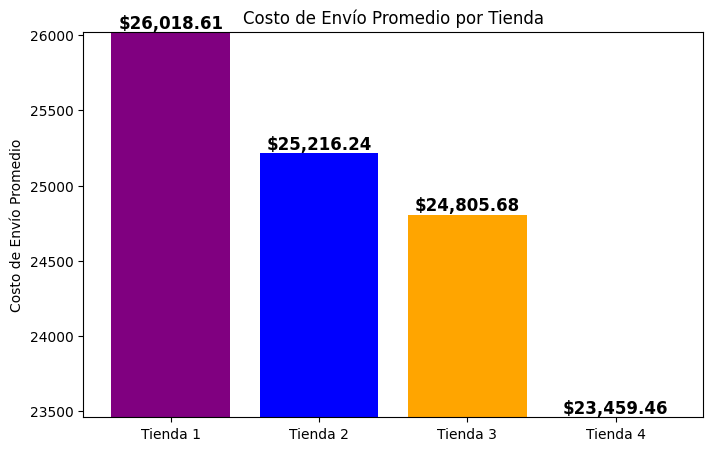

In [ ]:
import matplotlib.pyplot as plt

# Datos de costos de envío promedio
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
costos_envio = [envio_prom1, envio_prom2, envio_prom3, envio_prom4]

# Crear gráfico de barras vertical
plt.figure(figsize=(8, 5))
plt.bar(tiendas, costos_envio, color=['purple', 'blue', 'orange', 'green'])
plt.ylabel("Costo de Envío Promedio")
plt.title("Costo de Envío Promedio por Tienda")

# Ajustar límites del eje Y para mejorar la visibilidad de diferencias
plt.ylim(min(costos_envio) - 0.2, max(costos_envio) + 0.2)

# Agregar valores sobre las barras
for i, v in enumerate(costos_envio):
    plt.text(i, v + 0.05, f"${v:,.2f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

### 8.-Informe Final

El Sr. Juan nos ha solicitado que tienda de su cadena Alura Store, debe vender para iniciar un nuevo emprendimiento.

Para ello, analizaremos datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store.

El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.

Se analizan los Ingresos de las 4 tiendas

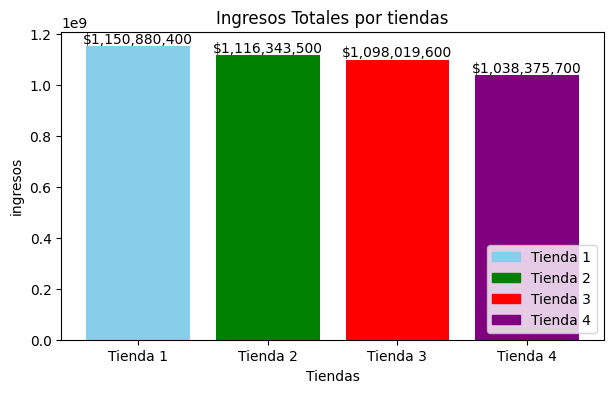

De acuerdo al análisis la Tienda N°1 es la que tiene los mejores ingresos y la Tienda N°4, los peores ingresos

Las categorías mas vendidas por tiendas, corresponde a la categoria de tipo electrónicos


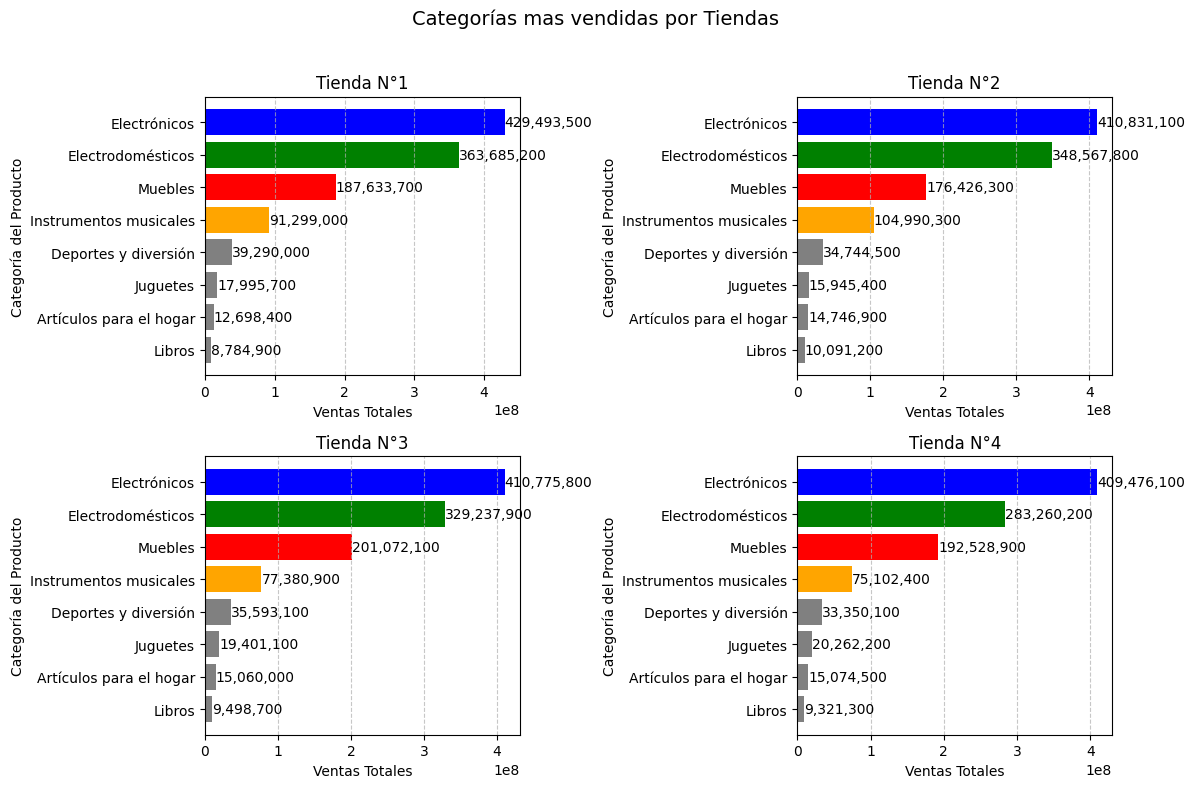

La Distribución de Inresos por Tienda es muy cercana al 25% en las 2 tiendas que venden menos


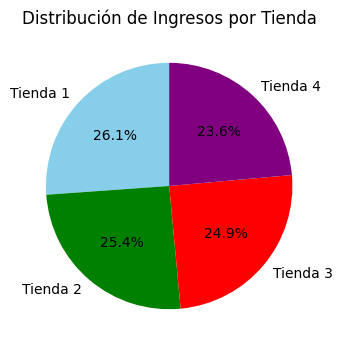

El Costo de envío promedio por tienda en muy menor en la tienda n°4

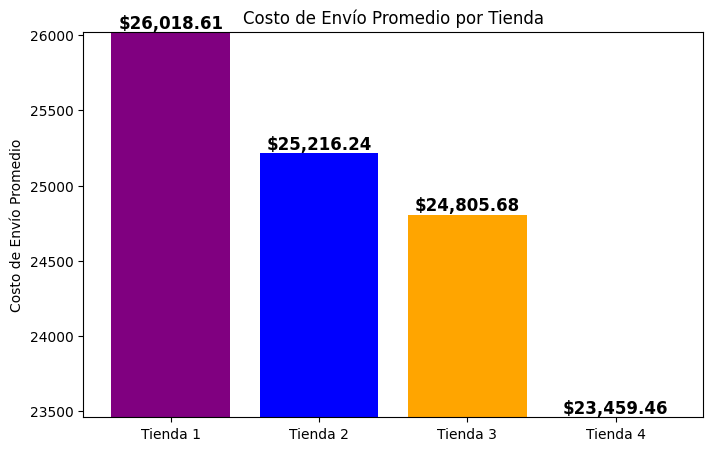

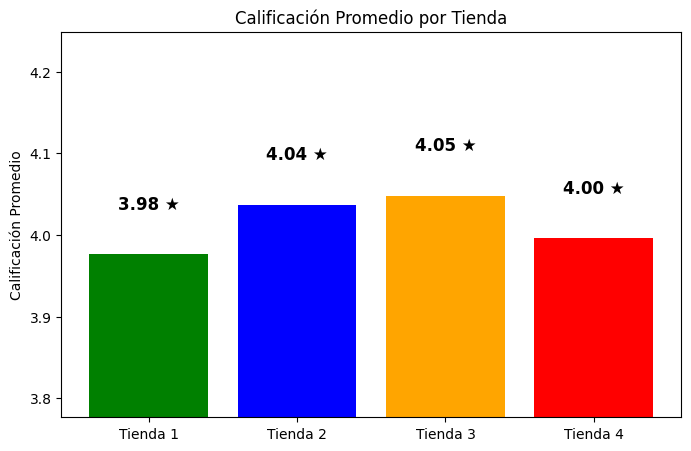

La tienda N°4, tiene una buena calificación de 4 pts, superior a la tienda N°1

La tienda N°4 que tiene la mejor Calificación, (si hacemos una proyección de 10 años), tiene una tasa de crecimiento superior.
Lo que podría hacer que eventualmente supere a la tienda N°1 en ingresos.

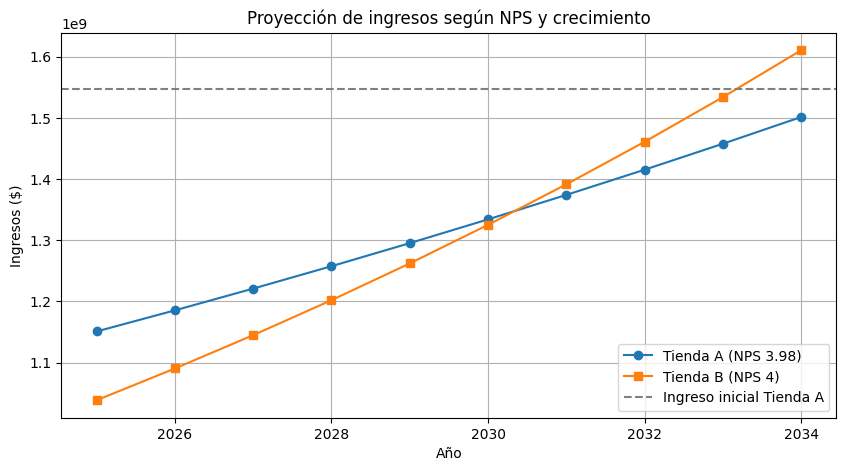

In [ ]:
import matplotlib.pyplot as plt

# Datos iniciales
ingresos_A = 1150880440  # Tienda con NPS 3.98
ingresos_B = 1038375700  # Tienda con NPS 4
crecimiento_A = 0.03  # Suponiendo 3% de crecimiento anual
crecimiento_B = 0.05  # Suponiendo 5% de crecimiento anual (mayor lealtad por mejor NPS)

años = []
ingresos_A_hist = []
ingresos_B_hist = []
year = 2025

# Simulación por 10 años
for i in range(10):
    años.append(year)
    ingresos_A_hist.append(ingresos_A)
    ingresos_B_hist.append(ingresos_B)

    # Crecimiento anual
    ingresos_A *= (1 + crecimiento_A)
    ingresos_B *= (1 + crecimiento_B)
    year += 1

# Visualización de los ingresos proyectados
plt.figure(figsize=(10, 5))
plt.plot(años, ingresos_A_hist, label="Tienda A (NPS 3.98)", marker="o", linestyle="-")
plt.plot(años, ingresos_B_hist, label="Tienda B (NPS 4)", marker="s", linestyle="-")
plt.axhline(y=ingresos_A, color="gray", linestyle="--", label="Ingreso inicial Tienda A")
plt.xlabel("Año")
plt.ylabel("Ingresos ($)")
plt.title("Proyección de ingresos según NPS y crecimiento")
plt.legend()
plt.grid()
plt.show()

Por tanto, en vista del análisis realizado. El Sr Juan tiene que vender la tienda N°1,(la de mayor venta), pero la que tiene mayor costo de envío, y la menor calificación de las otras 3 tiendas, con la venta de ella, puede reforzar la Tienda N°4, que si bien, tiene menor ingreso de ventas, como tiene una mejor calificación, si se trabaja de buena manera, podrá superar a las ventas de la tienda N°1